In [1]:
# Using Thomas algorithm to solve the linear BVP
import sys
import numpy as np
import matplotlib.pyplot as plt


def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f


def solve_BVP(coeffs, initial_cond, final_cond, h):
    """
    Read the input file to returns a dict
    The equation is in form: A y" + B y' + C y - D = 0
    and the boundary_conditions are y(l) = y_l and y(r) = y_r

    """

    A, B, C, D = coeffs
    l, y_l = initial_cond
    r, y_r = final_cond

    N = (r - l)/h
    assert int(N) == N
    N = int(N)

    a = [None for i in range(N-1)]
    b = [None for i in range(N-1)]
    c = [None for i in range(N-1)]
    d = [None for i in range(N-1)]

    for i in range(N-1):
        a[i] = A/(h**2) - B/(2*h)
        b[i] = -2*A/(h**2) + C
        c[i] = A/(h**2) + B/(2*h)
        d[i] = D
        if i == 0:
            d[i] = D - y_l*(A/(h**2) - B/(2*h))

    d[N-2] = D - y_r*(A/(h**2) + B/(2*h))

    f = [y_l] + thomas_algorithm(a, b, c, d) + [y_r]
    return f

In [11]:
# solving BVP y'' - y = 0
coeffs = (1, 0, -1, 0)
initial_cond = (0, 0)
final_cond = (1, 1)
h = 0.1
f = solve_BVP(coeffs, initial_cond, final_cond, h)
print f

[0, 0.08524468862598464, 0.17134182413822913, 0.25915237789185586, 0.3495544554244011, 0.44345207751119037, 0.5417842203730916, 0.6455342054387236, 0.7557395325587429, 0.8735022550043497, 1]


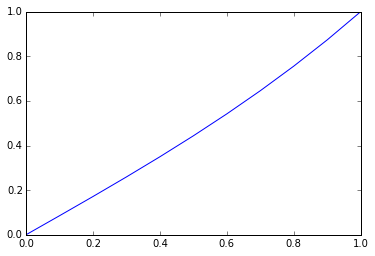

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
X = np.linspace(0, 1, 11)
plt.plot(X, f)